<a href="https://colab.research.google.com/github/courtneytumolac/Data-Science/blob/main/CourTumoU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I decided to do my project on Japan's national football team again, this time trying to figure out the true amount of goals they score against one country for all-time in all A internationals. I decided to do this because their all-time win rate (what I did for last unit's project) isn't really enough information to measure how "good" they are. The new skills we've learned in this unit can help to better assess their capabilities. Because this is sort of a "continuation" of last unit's project I'll be using the same dataset as before.


I decided to focus on their "goals for" just because I feel like offensive abilities are more indicative of a team's skill than their defensive (also why I focus on strikers).Also, it's usually better for teams to focus on their defensive prowess so that they don't crumble under really skilled opposition. If Japan is different than this and puts more of their energy into good offense, that wouldn't be fairly represented in my previous win rate data.

In a way, this project is me giving Japan another chance after being disappointed in them from last unit.

Source: https://www.11v11.com/teams/japan/tab/stats/#google_vignette

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 838.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 907.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


In [3]:
import preliz as pz

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

I needed to first input the goals data into colab. I used the website source above and manually stripped it down to just the "goals for", putting the data on my github so I could use it here, and then viewed it to make sure it worked.

In [5]:
#load the data from my github page. Works as long as you have an internet
#which you should if you're using colab.
url_goalsfor = 'https://raw.githubusercontent.com/courtneytumolac/Data-Science/refs/heads/main/goalsfor'
#I could have put the url string directly into pd.read_csv()
data_goalsfor = pd.read_csv(url_goalsfor)

In [6]:
#view raw data
#I did this, colab offered to plot it for me, which is wonderful
#I'd already made a histogram (shown in the next code block), but its a rad feature.
#There appear to be other features--use them, they seem neat!
data_goalsfor

,0
0,13
1,1
2,4
3,40
4,0
...,...
126,0
127,1
128,8
129,2


Here is the histogram of the data, which will help me understand what I need to do next.

(array([79., 20.,  9.,  8.,  4.,  3.,  1.,  2.,  1.,  4.]),
 array([ 0. ,  7.3, 14.6, 21.9, 29.2, 36.5, 43.8, 51.1, 58.4, 65.7, 73. ]),
 <BarContainer object of 10 artists>)

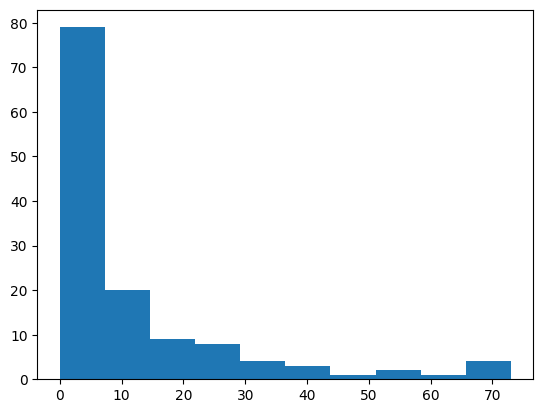

In [7]:
# Now I visualize the raw data as a histogram with 10 bins (the default)
plt.hist(data_goalsfor)

I think that the shape of this graph looks like an exponential function, so that's what I'm going to choose as my likelihood. First, I need a prior for my mean, and it's important that the prior only allow for positive numbers. I chose exponential

<Axes: >

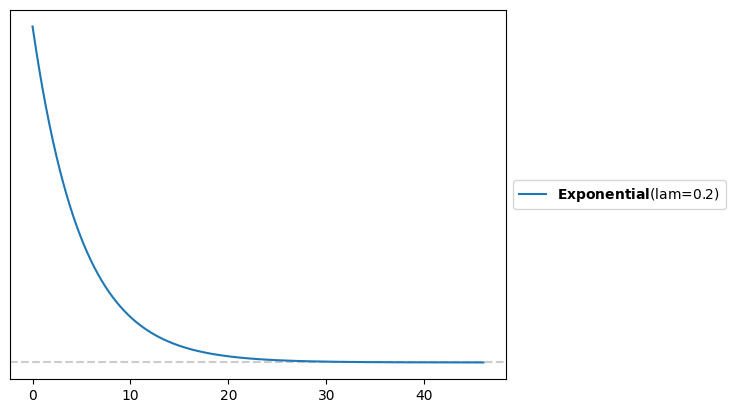

In [8]:
# Graphing the prior
# chose 5 as my guess, just by looking at the histogram
# It's 1/5 because of how exponential functions work
pz.Exponential(lam = 1/5).plot_pdf()

So now we can use the prior and data to graph the actual likelihood.

In [9]:
with pm.Model() as model_goalsfor:
    # exponential prior
    l = pm.Exponential('l',lam = 1/5)

    # graphing the likelihood with prior + data
    y = pm.Exponential('y', lam = l, observed=data_goalsfor)
    idata_goalsfor = pm.sample()

Output()

Output()

In [10]:
pm.sample_posterior_predictive(idata_goalsfor, model=model_goalsfor, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 70.0)

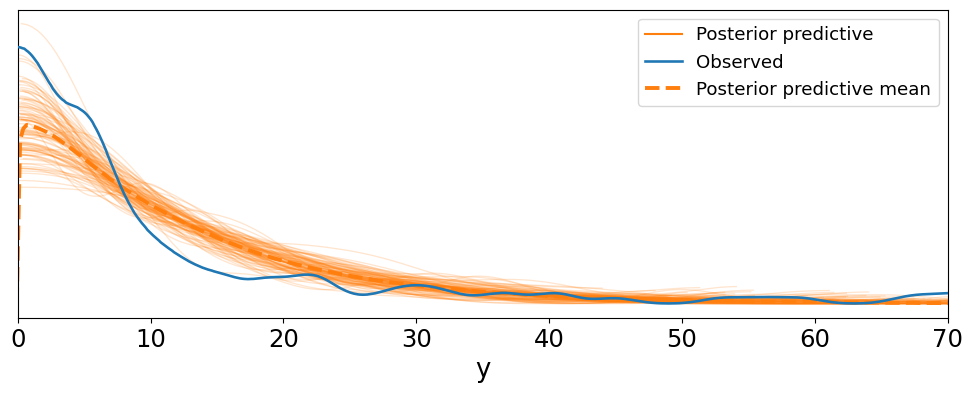

In [11]:
#The following code block is taken from the textbook BAP3.
#Plots the posterior predictive density overlaid with a smoothed version of the data

ax = az.plot_ppc(idata_goalsfor, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(0, 70)

So the computer was able to guess the general shape of the data, which is good. But it's not perfect, and this can definitely be improved. I decided to try choosing a different likelihood to see if it would work better.

I was looking online for other pymc distributions I could use, and decided to try ChiSquared. I know exactly nothing about this type of distribution other than it kind of resembles my histogram, so I used it anyway.

<Axes: >

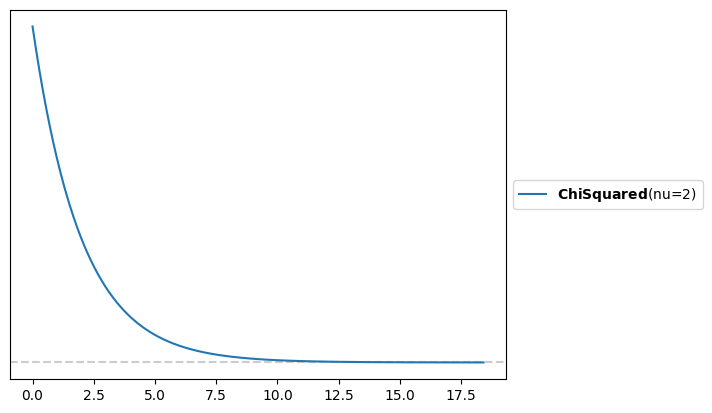

In [12]:
# new type of prior
# used 2 as my nu because it looked the best
pz.ChiSquared(nu=2).plot_pdf()

In [15]:
with pm.Model() as modell_goalsfor:
    # ChiSquared prior
    c = pm.ChiSquared('c', nu=2)

    # graphing the likelihood with prior + data
    z = pm.Exponential('z', lam = c, observed=data_goalsfor)
    hdata_goalsfor = pm.sample()

Output()

Output()

In [16]:
pm.sample_posterior_predictive(hdata_goalsfor, model=modell_goalsfor, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 70.0)

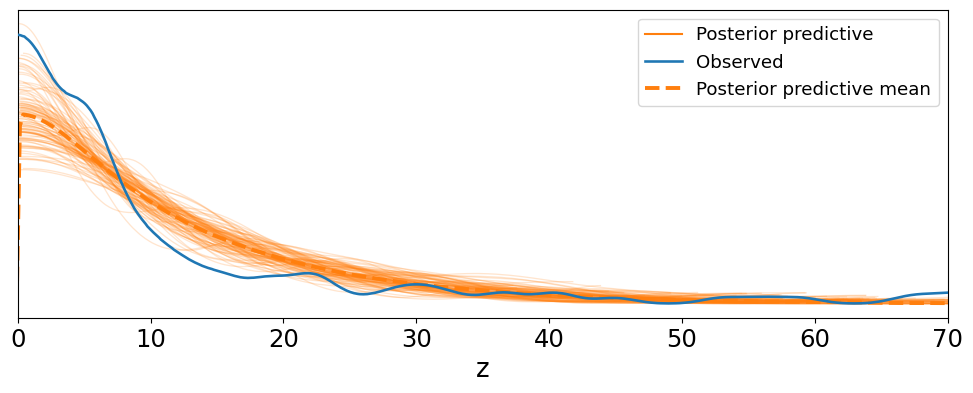

In [17]:
#The following code block is taken from the textbook BAP3.
#Plots the posterior predictive density overlaid with a smoothed version of the data

ax = az.plot_ppc(hdata_goalsfor, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(0, 70)

It looks... really similar. Extremely similar, to the point that I didn't even notice anything was different until I compared it to the exponential one. The predictions lines on the left are just slightly closer (further down) to the observed data, so I guess that ChiSquared is better? That being said, it's just marginally better, the difference is so minimal that I don't think it would really matter which one you used.

I looked at the rest of the pymc distributions and I don't think anything else even closely resembles my data, so I'll have to halt the project here.

Conclusion:

While I was able to get two models up and running that could thereotically be used, none of them were very accurate in the end. That being said, I'd say this project was overall a success? More testing is needed, but that's beyond the scope of both my knowlege and the time I have right now.

One thing I noticed while I was writing out my thoughts was that the information I analyzed might not be very accurate/useful after all. This is because obviously, Japan has not played the same number of games against every country. This means that a number may be higher or lower purely because of more or less games played. I don't know if this necessarily means the information is "useless", but I'm not really satisfied with the end result either way and I think more testing is needed.

One of my first ideas for this project was actually to find the true average of goals Japan makes per game. I think this would have been a lot more useful, I honestly just didn't want to find another dataset.